<a href="https://colab.research.google.com/github/omkardesai555/Cardiovascular_risk_Prediction/blob/main/Cardiovascular_risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardiovascular Risk Prediction**
***
Before diving into the project, lets discuss what are Cardiovascular diseases and some of their major causes.

Cardiovascular diseases, also called CVDs, are the leading cause of death globally, causing an estimated 17.9 million deaths each year.

***CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions.*** More than four out of five CVD deaths are due to heart attacks and strokes, and one third of these deaths occur prematurely in people under 70 years of age.

The most important behavioural risk factors of heart disease and stroke are **unhealthy diet, physical inactivity, tobacco use** and **harmful use of alcohol**.

The effects of behavioural risk factors may show up in individuals as raised blood pressure, raised blood glucose, raised blood lipids, and overweight and obesity.

##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Viraj Desai
##### **Team Member 2 -** Omkar Desai

## **Objective**

The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD) based on their health statistics and information about their tobacco usage.

# **GitHub Link -**

## **Importing Neccessary Libraries**

Now in this section we'll import all the neccessary libraries and packages we'll require to develop the required model. Libraries like Pandas(and numpy), matplotlib(and seaborn) and sklearn are required for data manipulation, visualization and Machine Learning respectively.

In [2]:
# Importing data visualization libraries.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing data manipulation libraries.
import pandas as pd
import numpy as np

# Importing warnings library. The warnings module handles warnings in Python.
# Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')

# Importing preprocessing libraries.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Importing model selection libraries.
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Importing various machine learning models.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Importing Support vector machine Classifier.
from sklearn import svm

# Importing XGB Classifier.
import xgboost as xgb

# Importing Tensorflow for neural networks.
from tensorflow import keras
import tensorflow as tf

# Importing Sklearn metrics for model evaluation.
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score

# Importing SMOTETomek for handling class imbalancies.
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

# Importing Counter.
from collections import Counter



## **Data Gathering and Discovery**

Now we'll import the data file and perform some basic operations to understand what type of data that we have and how we can process it to improve the model performance. We'll also check for null values and how we can deal with them.

In [3]:
# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# The variable Data_path contains the path of dataset stored in drive.
# Data_path = "/content/drive/MyDrive/AlmaBetter/Capstone Projects/Capstone Project 3 - Cardiovascular Risk/"
Data_path = "/content/drive/MyDrive/Almabetter/CapstoneProject/CapstoneProject2/"

# Importing Cardiovascular risk Data File.
Risk_df = pd.read_csv(Data_path + "data_cardiovascular_risk.csv")

# Show the dataframe.
Risk_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


*Now lets see the first few rows to the dataset to understand the data and see what all attributes are present in the data file.*

In [5]:
# First 5 rows of dataset.
Risk_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
# Last 5 rows of the Dataset.
Risk_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [7]:
# Shape of the data file (rows, columns).
Risk_df.shape

(3390, 17)

In [8]:
# list of columns.
Risk_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

*The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The dataset provides the patient's information and health stats. It includes over 4,000 records and 15 attributes.*

**Data Description and Attributes:-**

* id: Patient identification number.

**Demographic**:

* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

**Behavioral**

* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**

* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**

* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)

**Dependent variable (desired target)**

* ***10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)***

In [9]:
# Description of all columns in the dataset.
Risk_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3390.0,NaN,NaN,NaN,1694.5,978.753033,0.0,847.25,1694.5,2541.75,3389.0
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BPMeds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0


In [10]:
# Brief information about the datatype of attributes and their null counts.
Risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

We can see there's a lot of null values available in the data, specially in columns like glucose, education, BPMeds, and totchol the numbers are very high. Lets do null counts to be clear on this.

In [14]:
# checking the total missing values for all the attributes.
Risk_df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

As we can see there's a lot of null values accross different columns. We can be more clear on this once we see a percentage distribution of null value counts and how much they'd affect our analysis.

In [15]:
# columns that have at least one null value.
missing = Risk_df.columns[Risk_df.isnull().any()].tolist()

# printing missing value counts for various columns.
print('Missing Data Count')
print(Risk_df[missing].isnull().sum().sort_values(ascending = False))

print('--'*12)

# printing missing value percentages for various columns.
print('Missing Data Percentage')
print(round(Risk_df[missing].isnull().sum().sort_values(ascending = False)/len(Risk_df)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


Now the main issue with these null values is that they can't be estimated from other data entries. The dataset we are working on is from a medical domain, that said, the entries in this data are person specific and the values vary among different individuals. Its a rare chance the two individuals share same health stats, hence the most logical option that we have to deal with such values is removing the rows with any null value.

We could have tried imputing them using some advance techniques like *KNNImputer*, but they couldn't be that accurate because it'll use other entries to estimate the nulls, hence the values would depend on the values present among other rows, which as discussed earlier isn't a ideal approach for such dataset.

## **EDA and Feature Engineering**

Exploratory data analysis or commonly known as EDA helps to explore data, and possibly formulate hypotheses that might cause new data collection and experiments. EDA build a robust understanding of the data, issues associated with either the info or process. It’s a scientific approach to get the story of the data.

It focuses more narrowly on checking assumptions required for model fitting and hypothesis testing. It also helps while handling missing values and making transformations of variables as needed. Also we'd deal with outliers in this section. Furthermore, we'll try to extract or convert some of the attributes using some feature engineering.

All machine learning algorithms use some input data to create outputs. This input data comprise features, which are usually in the form of structured columns. Algorithms require features with some specific characteristics to work properly. Here, the need for feature engineering arises. Feature engineering mainly have two goals:

* Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
* Improving the performance of machine learning models.

*Lets just start by removing all null values from the data.*

In [16]:
# dropping the missing value since we cannot fill it using imputing techniques as
# this data is related to medical domain (hence varies from person to person).
df = Risk_df.dropna(how = "any")

# Checking if there's still any null values left.
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

As we can see all the null values have been removed, this surely cost us some valuable data loss but given the options, there was no better choice but to remove those rows having nulls.

Also the patient ID doesn't contribute their health stats, and it would'nt be of much help to the model either. Hence, we can drop the "ID" column too.

In [17]:
# Dropping the "id" column.
df = df.drop(columns=['id'])

*Now lets have a look at the remaining columns.*

In [18]:
# Print all columns.
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Here, **TenYearCHD** signifies if the person has a risk of heart disease or not. Its a binary attribute(binary: “1”, means “Yes”, “0” means “No”) resembling the diagnosis results for patients. We can use this attribute to see how many patients have a risk of CHD.

### TenYearCHD

In [19]:
# Checking the total people who have a risk of CHD(Coronary Heart Disease).
df["TenYearCHD"].value_counts()

0    2483
1     444
Name: TenYearCHD, dtype: int64

We can see number of patients with heart diasease are significantly low compared to those whose tests came out normal. We can have a better picture by plotting a bar graph.

*Now lets try to plot the information conveyed above.*

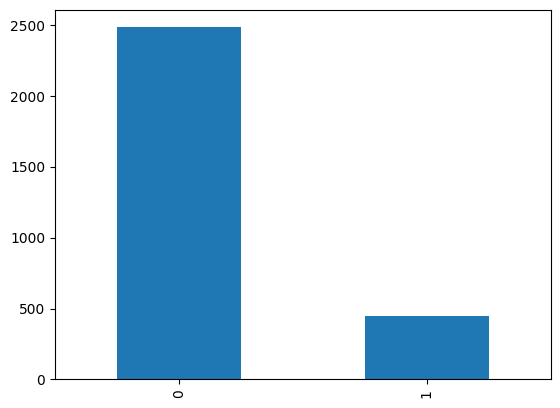

In [20]:
# plotting number of patients at risk of CHD vs those whose results are normal.

df["TenYearCHD"].value_counts().plot.bar()
plt.show()

It is clear the percentage/count of people with normal results are pretty high and this creates a problem of class imbalance. It could create problems for model to perform better in such case because it'll be overfitted with entries of normal patients and hence it becomes hard to predict for a person with a disorder because the model would be biased for the other output.

So we have to convert this data into a balance class, we can achieve so by using different sampling techniques, during train/test split.

### Gender

In [21]:
# Counting the number of males and females.
df["sex"].value_counts()

F    1620
M    1307
Name: sex, dtype: int64

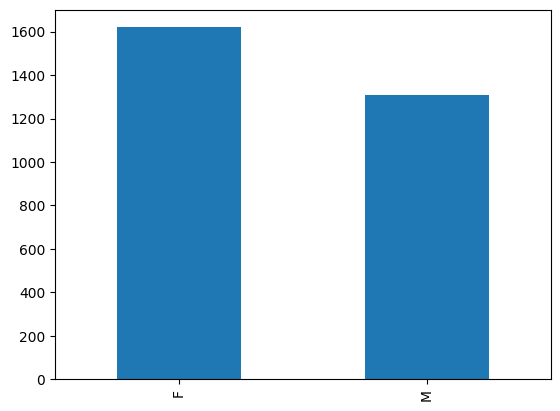

In [22]:
# Plotting the bar graph with number of males and females.

df["sex"].value_counts().plot.bar()
plt.show()

We can see that number of female entries are more than males. Since the data is a bit biased towards females, the model would be much more optimal to predict for a female patient.

Also we can convert this attribute into binary values (0 and 1) in order to pass it to the training model.

In [23]:
# Converting "sex" into binary column(0 for females and 1 for males).
df['sex'] = df['sex'].map({'M':1 ,'F': 0})

### Is_Smoking

In [24]:
# Counting the number of smokers.
df["is_smoking"].value_counts()

NO     1480
YES    1447
Name: is_smoking, dtype: int64

There are nearly same amount of entries with people who smokes and those who does'nt, this is great since it wont cause any class imbalancies or biasness.

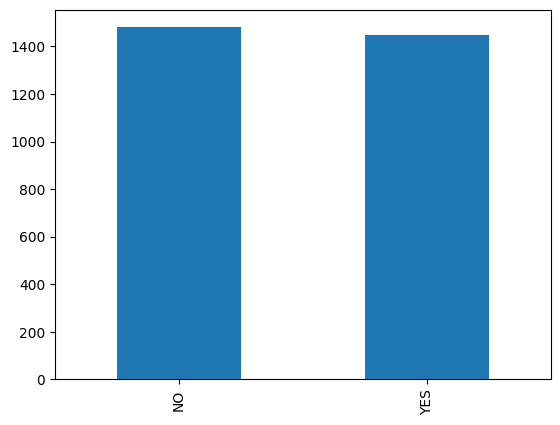

In [25]:
# Plotting number of people smoking vs not smoking.
df["is_smoking"].value_counts().plot.bar()
plt.show()

Now, lets see the smoking patterns across different genders. First we'll see the number of males smoking.

In [26]:
df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,4.0,1,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,3.0,0,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,1.0,0,NO,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0
3385,60,1.0,0,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,0,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,1,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


In [27]:
# Number of males who smokes cigarette.
male_smokers = df.loc[(df['is_smoking']=='YES') & (df['sex']==1)]

In [28]:
male_smokers.shape[0]

809

There's a total of 809 males who smokes at least one cigarette a day.

In [29]:
# Number of females who smokes cigarette.
female_smokers = df.loc[(df['is_smoking']=='YES') & (df['sex']==0)]

In [30]:
# Female smokers.
female_smokers.shape[0]

638

There's a total of 638 females who smokes at least one cigarette a day.

Its clear that number of males who smokes are significantly higher than the female smokers, even though the entries for female patients were more. This shows smoking is more common in males and its a major cause of CHDs for male patients.

Similar to the gender we can convert "is_smoking" into binary too.

In [31]:
# Converting "is_smoking" into binary(1 for people who smokes and 0 for those who does'nt).
df['is_smoking'] = df['is_smoking'].map({'YES':1 ,'NO': 0})

### Diabetes

In [32]:
df["diabetes"].value_counts()

0    2848
1      79
Name: diabetes, dtype: int64

We can see that there's a huge gap between the people who have diabetes and to those who does'nt, infact there are only 79 people who does have diabetes. This again depicts the data is biased for non-diabetic patients.

### Distributions

In [33]:
# Differentiating the numerical and categorical features
categorical_features = [i for i in df.columns if df[i].nunique()<=4]
numeric_features = [i for i in df.columns if i not in categorical_features]

print("Following are the categorical features in this dataset:")
print(categorical_features)
print("Following are the numeric features in this dataset:")
print(numeric_features)

Following are the categorical features in this dataset:
['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
Following are the numeric features in this dataset:
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


Categorical Features are mostly binary type in our case, hence the values majorly are either 0 and 1 (some exceptions excluded). As for the numeric features, all have a different set of range and continuity of values.

Now, lets see the distribution graphs for all features.

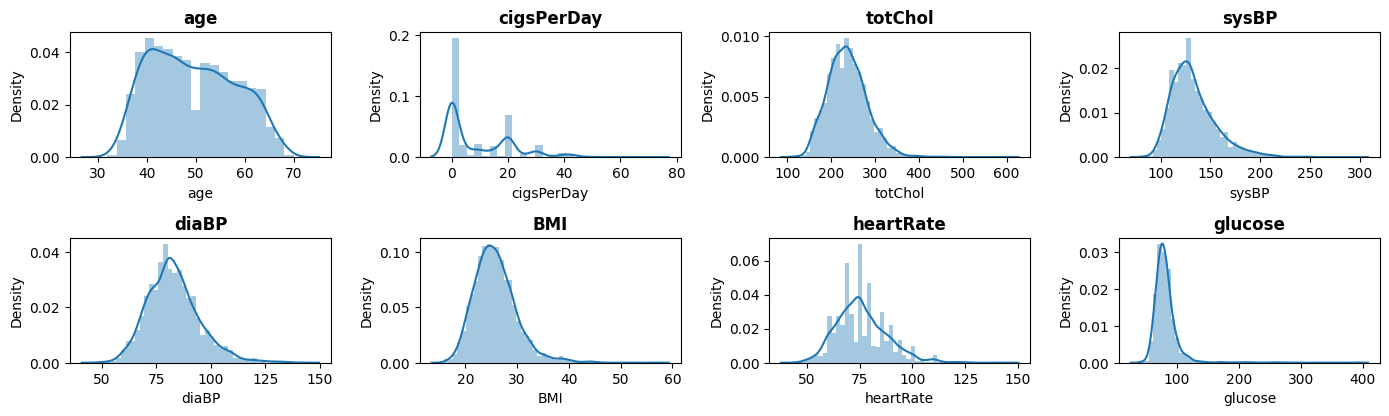

In [34]:
# Visualizing the distributions for numeric features.
# Defining figure.
plt.figure(figsize=(14,10))

# plotting subplots for all numeric features.
for i, column in enumerate(numeric_features):
  plt.subplot(5, 4, i+1)
  sns.distplot(df[column])
  plt.title(f'{column}', weight='bold')
  plt.tight_layout()

***
We can observe that most of the distributions are right skewed for numeric features. **totChol** (total cholesterol) and **BMI** have roughly similar distributions, which depicts a linear dependency. **Glucose** have a highly right skewed distribution, this might lead to some biasness. It shows Glucose has a lotof outliers. Though it is usually a good practice to deal with such outliers, however in this case we can't do much about it. The data is taken through medical survey and the values are patient's health stats, hence those values are absolute and we cant manipulate them by any means. We could have used techniques like Square root transformation, Log tranformation,etc., to convert the column for getting a better distribution, but since we can't manipulate a medical statistics of a person, it is suggestive to go with the actual values.

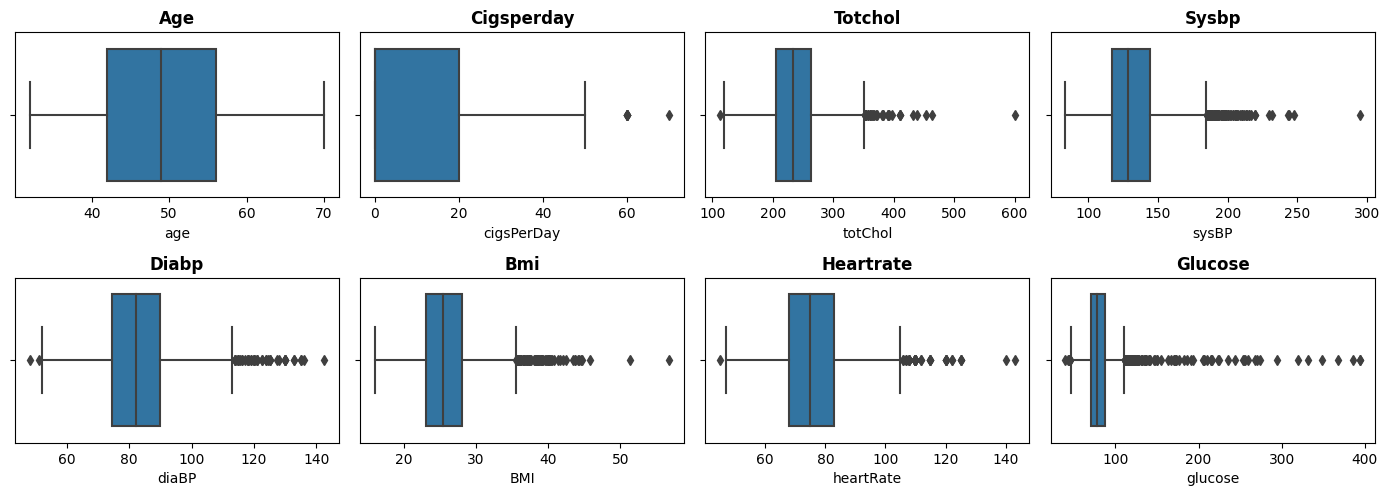

In [36]:
# Box plot distributions for numeric features.
# Define a figure.
plt.figure(figsize=(14, 12))

# plotting subplots for every numeric feature.
for i, column in enumerate(numeric_features):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(data=df, x=column)  # Use sns.boxplot for box plots
    plt.title(f'{column.title()}', weight='bold')
    plt.tight_layout()

# Show the plots
plt.show()

We can see a lot of outliers in columns like, **Totchol**, **SysBP**, **DiaBP**, **BMI**, **Glucose**, etc. As stated before we can't manipulate data in such way that we change the original patient stats, neither we can entirely drop those entries with outliers. This will lead to huge amount of data loss, We would lose meaningful data in order to achieve this. The best solution to this could only be, to drop the rows with such outliers with minimal data loss.

*Dropping rows with borderline outliers, We'll try to be considerate and only drop values that do not make any sense or unlikely to occur.*

In [37]:
# Dropping rows with Cigarette per day greater than 50.
df = df[df["cigsPerDay"] <= 50]

In [38]:
# Dropping rows with DiaBp greater than 140.
df = df[df['diaBP'] <= 140]

In [39]:
# Dropping rows with SysBP greater than 250.
df = df[df['sysBP'] <= 250]

In [40]:
# Dropping rows with BMI greater than 50.
df = df[df['BMI'] <= 50]

In [41]:
# Dropping rows with heart rate greater than 130.
df = df[df["heartRate"] <= 130]

In [42]:
# Dropping rows with glucose greater than 300.
df = df[df["glucose"] <= 300]

In [43]:
# Dropping rows with total cholesterol greater than 500.
df = df[df["totChol"] <= 500]

In [44]:
# Generalized dataset.
df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,3.0,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,1.0,0,0,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0
3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


### Univariate Analysis

The purpose of univariate analysis is to understand the distribution of values for a single variable.

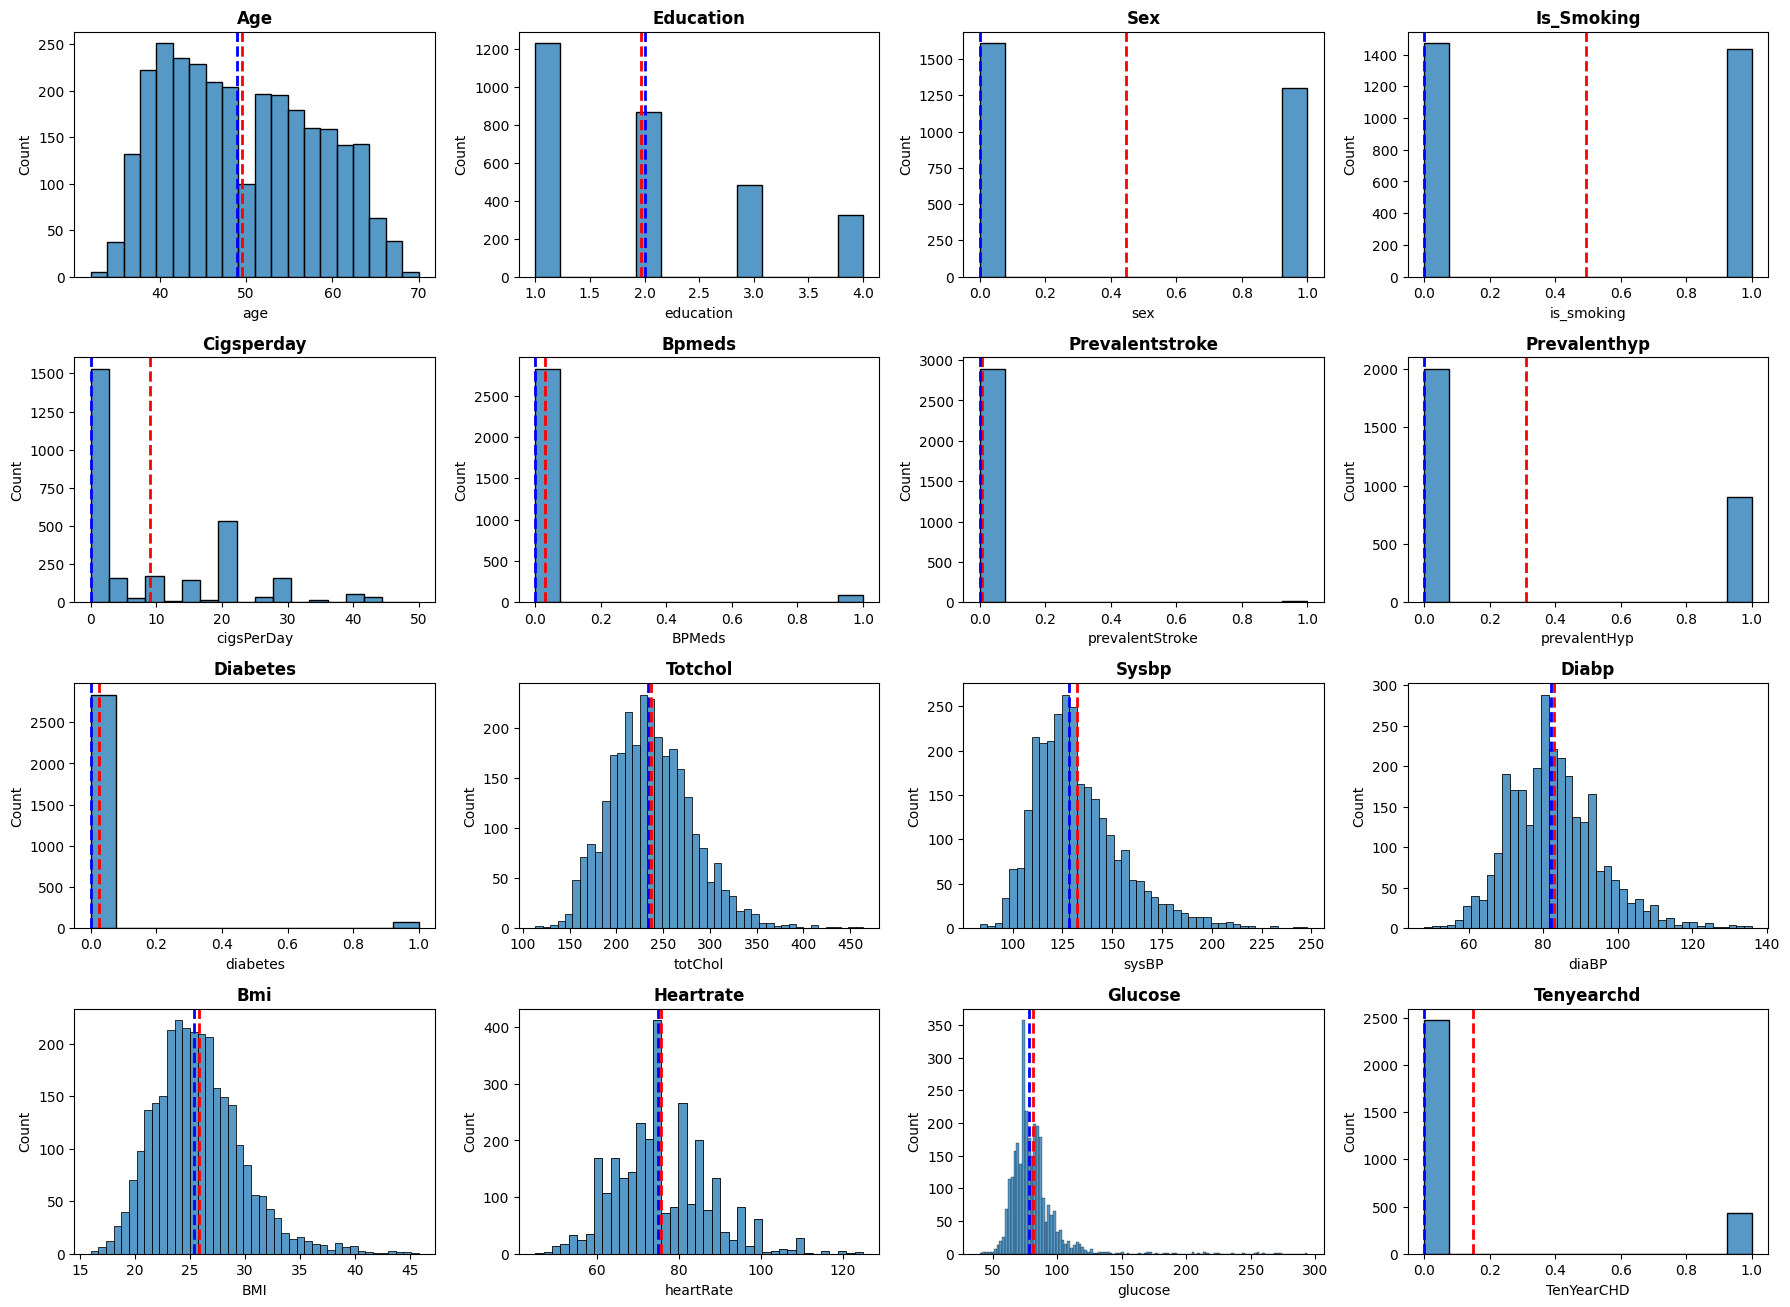

In [45]:
# Visualizing the mean and median lines for various attributes,
# along with their distribution graphs.
plt.figure(figsize=(18,16))

# Making subplots for all the features to represent their mean, median and distributions
for i, column in enumerate(df.columns):
  feature = df[column]
  ax=plt.subplot(5, 4, i+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

### Bivariate Analysis

Bivariate analysis is stated to be an analysis of any concurrent relation between two variables or attributes. This study explores the relationship of two variables as well as the depth of this relationship to figure out if there are any discrepancies between two variables and any causes of this difference.

*In our case we'll look for relationships of target variable with all the independent variables.*

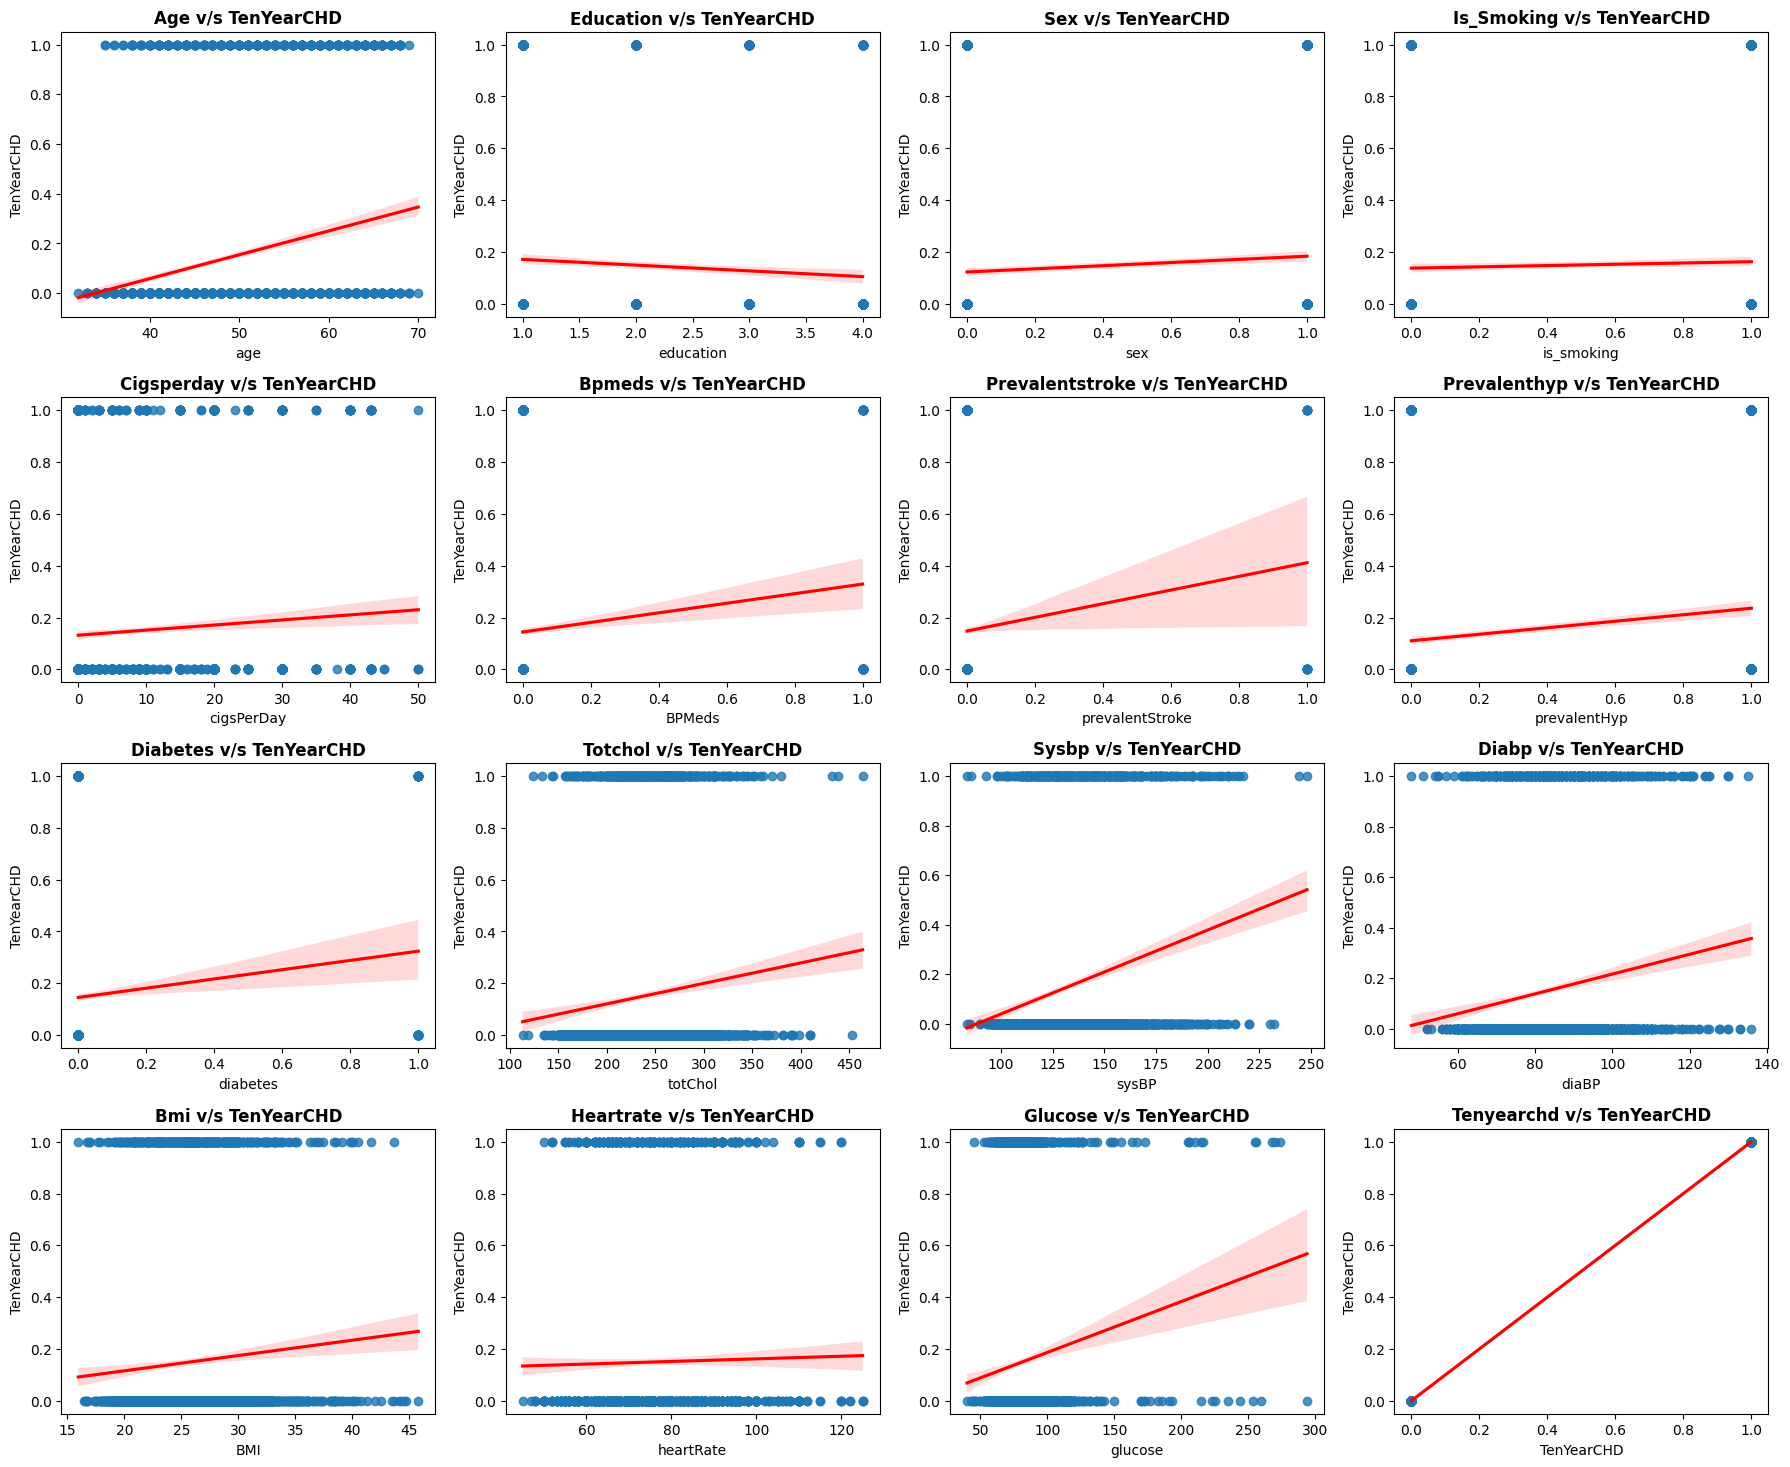

In [46]:
# Checking Linearity using Bivariate analysis.
# list of independent variables.
independent_variables = [i for i in df.columns if i not in ['TenYearCHD']]

# defining figure.
plt.figure(figsize=(18,18))

# making subplots for all independent variables vs TenYearCHD(dependent variable).
for n, column in enumerate(df.columns ):
  plt.subplot(5, 4, n+1)
  sns.regplot(x = df[column], y =df['TenYearCHD'],line_kws={"color": "red"})
  plt.title(f'{column.title()} v/s TenYearCHD',weight='bold')
  plt.tight_layout()

### Multivariate analysis

The purposes of multivariate data analysis is to study the relationships among the P attributes, classify the n collected samples into homogeneous groups, and make inferences about the underlying populations from the sample.

*We'll use a correlation map for performing multivariate analysis.*

<Axes: >

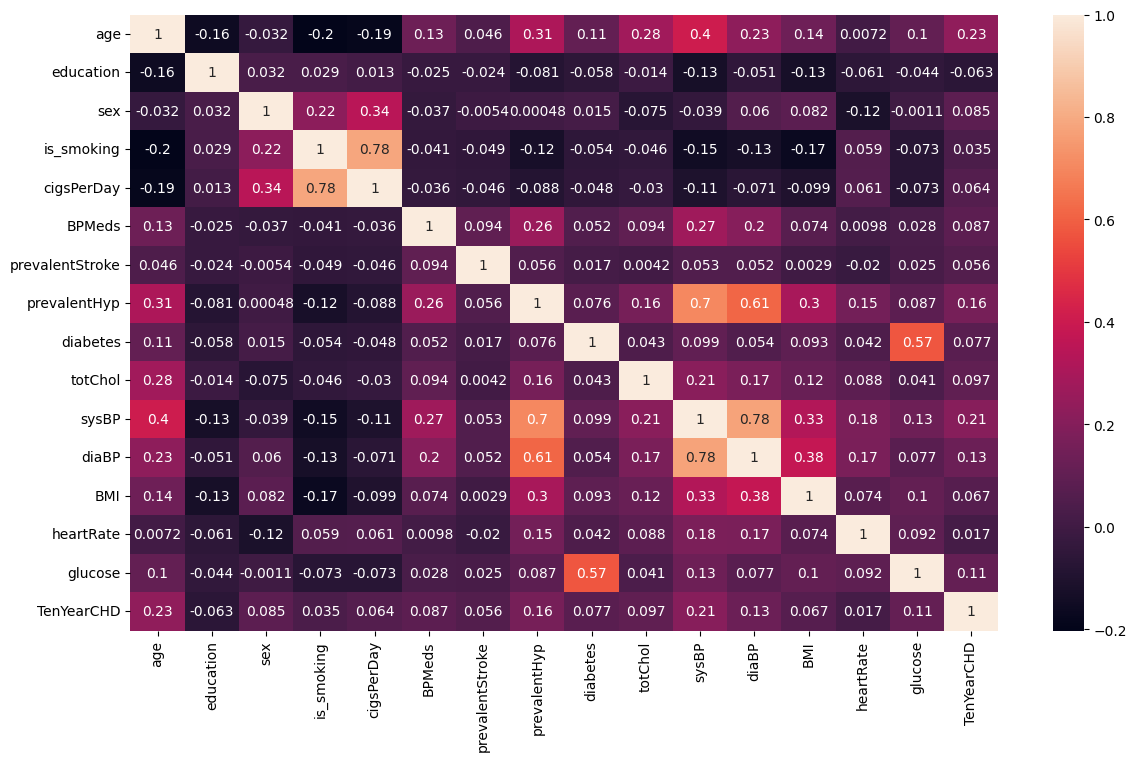

In [47]:
# Defining a Seaborn correlation map(Heatmap).
correlmap = df.corr()

# display the heatmap.
f, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(correlmap, annot=True, ax = ax)

### DiaBp and SysBP

From the above Heatmap, We can see both of these columns are heavily correleted, there's some relationship we can establish with these two features further.

Also Elevation of systolic blood pressure predicts the risk of cardiovascular disease better than increases in diastolic blood pressure. Although associated with more variability in measurement, systolic blood pressure is easier to determine and allows more appropriate risk stratification than diastolic blood pressure.

We can combine these two features using the following formula:

**MAP = (Systolic Blood Pressure + 2 x Diastolic Blood Pressure) / 3**
----------------

*Here, MAP signifies Mean Arterial Pressure*

In [48]:
# Calculating MAP using 'SysBP' and 'DiaBP'.
df["MAP"] = (df["sysBP"] + 2 * df["diaBP"])/3

In [49]:
# Dropping the SysBP and DiaBp attributes, since they're both included in MAP.
df.drop(columns = ["sysBP", "diaBP"], inplace = True)

**Correlation After Adding MAP Column**

<Axes: >

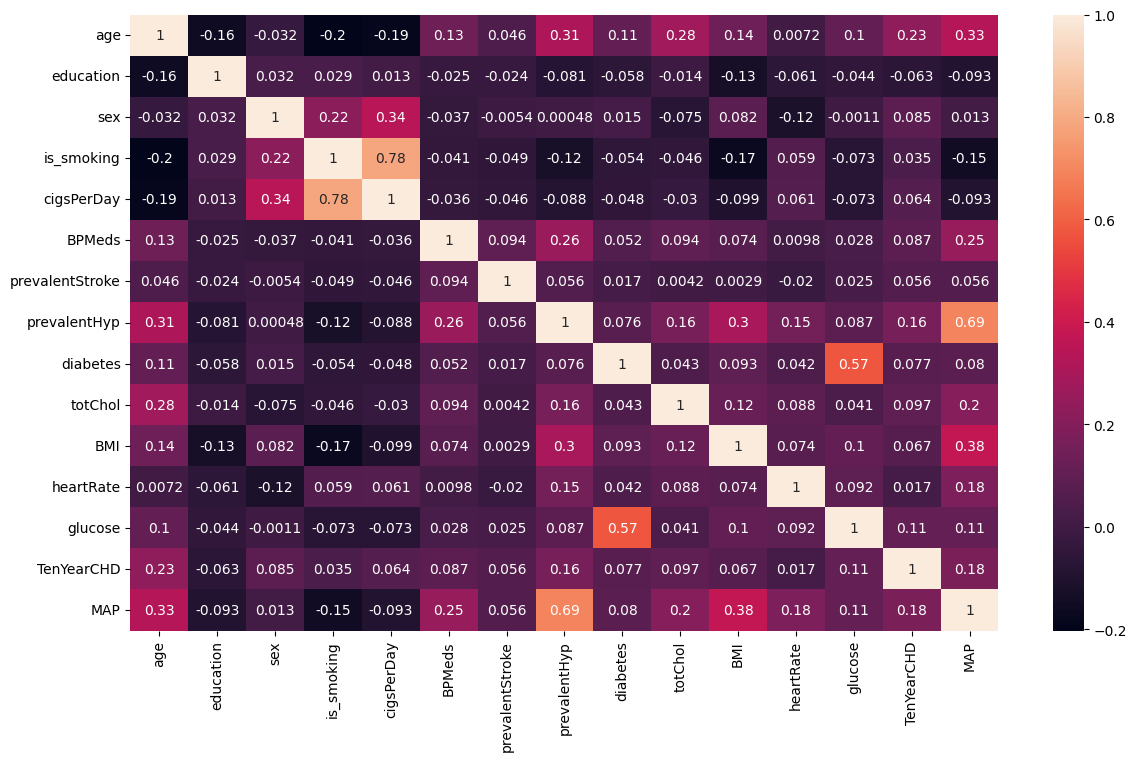

In [50]:
# Defining a Seaborn correlation map(Heatmap).
correlmap = df.corr()

# display the heatmap.
f, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(correlmap, annot=True, ax = ax)

In [51]:
# Final DataFrame.
df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,MAP
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,121.333333
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,86.000000
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,1,111.333333
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,26.42,70.0,77.0,0,102.166667
5,61,3.0,0,0,0.0,0.0,0,1,0,272.0,32.80,85.0,65.0,1,141.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,1.0,0,0,0.0,0.0,0,1,0,217.0,26.98,105.0,113.0,0,118.000000
3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,29.28,70.0,103.0,0,93.833333
3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,21.96,80.0,84.0,0,71.333333
3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,28.92,73.0,72.0,1,134.000000


## **Model Development**

Now its time to implement the Machine Learning models and check the accuracy of each model to point out the best one out of all. In this project we are implementing 8 machine learning algorithms to predict the target variable and also we'll apply optimization techniques to get the best resulting accuracy.



### **Prerequisites**

Now that the Dataset is cleaned and we have added all the neccessary features along with some conversions of categorical features. Its time to split the data into training and testing sets.

Note:- These training and testing data are going to be same for all the model we'll build such that all of the models are evaluated on a same set of parameters.

In [52]:
# Splitting the data into set of independent variables and a dependent variable.
X = df.drop('TenYearCHD',axis=1).values
y = df['TenYearCHD'].values

In [53]:
# Splitting the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, stratify = y)

In [54]:
# Training data alomg with possible number of results for each class.
pd.DataFrame(y_train).value_counts()

0    1976
1     348
dtype: int64

In [55]:
# Testing data alomg with possible number of results for each class.
pd.DataFrame(y_test).value_counts()

0    495
1     87
dtype: int64

We can clearly see, the class are imbalanced and it'd result the model to be more biased towards '0' class (people with no Risk of CHD). We need to find a way to train a model in such a way that it can take some risks and give more of '1' class results.

The reason behind that is we have a make a model that can predict a risk of CHD. If, based on patient's health stats, there's even small chance that a person could have a risk of heart disease, the model should be able to predict the risk.

*Surely this would lead our model to attain a lower accuracy value since its taking more risks for 'at risk' patients, but in a real world scenario this model is more useful because its highly likely for such model to be able to predict if a patient is at risk.*

If we would have used a normal approach here, it might give us a better accuracy thanks to the class imbalancy, but in real world such model isn't a ideal solution, its expected that it'd mostly fail to predict if the patient isat risk, which takes away the sole purpose of the project.

Hence, to deal with this imbalancies we are using SMOTETomek on the training set. This is a type of data augmentation for the minority class and is referred to as the **Synthetic Minority Oversampling Technique**, or **SMOTE** for short. The approach is effective because new synthetic examples from the minority class are created that are plausible, that is, are relatively close in feature space to existing examples from the minority class.

In [56]:
# Handling class imbalancies using SMOTE.
X_smote, y_smote = SMOTETomek(random_state=42).fit_resample(X_train, y_train)

In [57]:
# Dataframe to contain Model performance analysis reports.
res_df=pd.DataFrame()

### **Models**

Following models have been used for predictions:-

* Logistic Regression Classifier
* K-Nearest Neighbors(KNN Classifier)
* Naive Bayes Classifier
* Support Vector Machine(SVM Classifier)
* XGB Classifier
* Decision Tree Classifier
* Random Forest Classifier
* Neural Networks Classification

#### **Logistic Regression**

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Logistic Regression is used when the dependent variable(target) is categorical. The model delivers a binary or dichotomous outcome limited to two possible outcomes: yes/no, 0/1, or true/false.

Logical regression analyzes the relationship between one or more independent variables and classifies data into discrete classes. It is extensively used in predictive modeling, where the model estimates the mathematical probability of whether an instance belongs to a specific category or not.

For example, 0 – represents a negative class; 1 – represents a positive class. Logistic regression is commonly used in binary classification problems where the outcome variable reveals either of the two categories (0 and 1).

Typical properties of the logistic regression equation include:
* Logistic regression’s dependent variable obeys ‘Bernoulli distribution’
* Estimation/prediction is based on ‘maximum likelihood.’
* Logistic regression does not evaluate the coefficient of determination (or R squared) as observed in linear regression’. Instead, the model’s fitness is assessed through a concordance.


In [58]:
# Creating model object for logistic regression.
clf = LogisticRegression(fit_intercept=True, max_iter=10000)

# fit the model.
clf.fit(X_smote, y_smote)

LogisticRegression(max_iter=10000)

In [59]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_smote)
test_preds = clf.predict_proba(X_test)

In [60]:
# Getting the predicted classes for training and testing set.
train_class_preds = clf.predict(X_smote)
test_class_preds = clf.predict(X_test)

In [61]:
# Getting the accuracy scores for training and testing set.
train_accuracy = accuracy_score(train_class_preds, y_smote)
test_accuracy = accuracy_score(test_class_preds, y_test)

# Display accuracies.
print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6748591909882232
The accuracy on test data is  0.654639175257732


In [62]:
# Confusion Matrix for logistic regression classifier.
confusion_matrix(y_test,test_class_preds)

array([[320, 175],
       [ 26,  61]])

In [63]:
# Predicted values.
y_pred_log_reg = clf.predict(X_test)

In [64]:
# Getting classification report.
dict1 = classification_report(y_test, y_pred_log_reg, output_dict = True)

# Adding results to the evaluation dataframe.
tempodf = pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'Logistic Regression Classifier'

res_df = res_df.append(tempodf[2:-2])

In [65]:
# Display model evaluation dataframe.
res_df

,precision,recall,f1-score,support,Model
accuracy,0.654639,0.654639,0.654639,0.654639,Logistic Regression Classifier


#### **K-Nearest Neighbour (KNN)**

KNN which stands for K-Nearest Neighbours is a simple algorithm that is used for classification and regression problems in Machine Learning. KNN is also non-parametric which means the algorithm does not rely on strong assumptions instead tries to learn any functional form from the training data.

*Unlike most of the algorithms with complex names, which are often confusing as to what they really mean, KNN is pretty straight forward. The algorithm considers the k nearest neighbours to predict the class or value of a data point.*

The K Nearest Neighbour Algorithm can be performed in 4 simple steps.

* Step 1: Identify the problem as either falling to classification or regression.

* Step 2: Fix a value for k which can be any number greater than zero.

* Step 3: Now find k data points that are closest to the unknown/uncategorized datapoint based on distance(Euclidean Distance, Manhattan Distance etc.)

* Step 4: Find the solution in either of the following steps:

In case of classification, we assign the uncategorized datapoint to the class where the maximum number of neighbours belonged to.

In [66]:
# Number of neighbors.
neighbors = np.arange(1,10)

# Setup arrays to store training and testing accuracies.
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Iterate over n-neighbors in order to get the best hyperparemeter value
for i,k in enumerate(neighbors):

    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the KNN model
    knn.fit(X_smote, y_smote)

    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_smote, y_smote)

    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

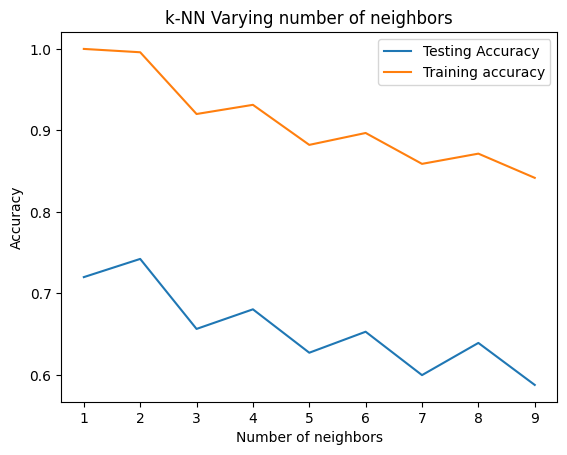

In [67]:
# Generate plot to represent accuracies for training and testing with regards to KNN model
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

*We can see that n_neighbors as 2 gives the best test accuracy and hence we'll use this as the best hyperparameter to fit our model.*

In [68]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors = 2)

In [69]:
# Fit the model
knn.fit(X_smote, y_smote)

KNeighborsClassifier(n_neighbors=2)

In [70]:
# Getting the predictions using the KNN classifier
y_pred_knn = knn.predict(X_test)

In [71]:
# Confusion matrix for KNN classifier
confusion_matrix(y_test,y_pred_knn)

array([[408,  87],
       [ 63,  24]])

In [72]:
# Getting the prediction probabilities for test set
y_pred_proba_knn = knn.predict_proba(X_test)[:,1]

In [73]:
# Getting parameters for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_knn)

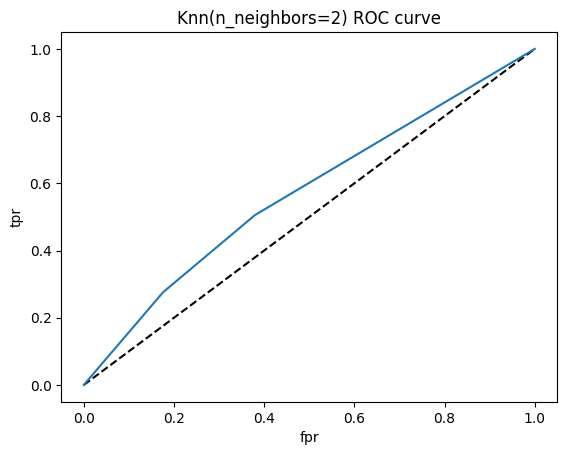

In [74]:
# Plotting the ROC curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=2) ROC curve')
plt.show()

In [75]:
# Area under ROC curve
roc_auc_score(y_test,y_pred_proba_knn)

0.5709160571229537

In [76]:
# Finding precision and recall
recall_score(y_test, y_pred_knn)

0.27586206896551724

In [77]:
# Getting precision score
precision_score(y_test, y_pred_knn)

0.21621621621621623

In [78]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
# Using Grid search CV for getting the best set of hyperparameters
param_grid = {'n_neighbors':np.arange(1,50)}

In [79]:
# Implementing KNN with gridCV model
knn = KNeighborsClassifier()

# Creting gridCV KNN model with 5 cross validations
knn_cv= GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_smote, y_smote)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [80]:
# Best score for knn model with grid CV
knn_cv.best_score_

0.9004116304429693

In [81]:
# Best parameter value
knn_cv.best_params_

{'n_neighbors': 2}

In [82]:
# Predict for test set
y_pred_knn_cv = knn_cv.predict(X_test)

In [83]:
# Adding results to model evaluation dataframe
dict1 = classification_report(y_test, y_pred_knn_cv, output_dict=True)
tempodf=pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'K Nearest Neighbours'

res_df=res_df.append(tempodf[2:-2])

In [84]:
# Result dataframe
res_df

,precision,recall,f1-score,support,Model
accuracy,0.654639,0.654639,0.654639,0.654639,Logistic Regression Classifier
accuracy,0.742268,0.742268,0.742268,0.742268,K Nearest Neighbours


#### **Naive Bayes Classifier**

The Naïve Bayes algorithm is a classification technique based on the Bayes’ Theorem which assumes there is independence between the features. We interfere with applications utilizing this algorithm on a daily basis, for example it powers recommendation systems for streaming applications or adds on social media as well as many online retail websites.

Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods. Let’s have a look under the hood of this major classifier.

The simple form of the calculation for Bayes Theorem is as follows:
**P(A|B) = P(B|A) * P(A) / P(B)**
----------------------------------------------

In [85]:
# Creating naive bayes model
gnb = GaussianNB()

# Fitting the model
gnb.fit(X_smote, y_smote)

# Making predictions on training and testing set
y_pred_gnb = gnb.predict(X_test)
y_train_pred = gnb.predict(X_smote)

In [86]:
# Display accuracy scores for training and testing sets
print(accuracy_score(y_train_pred, y_smote))
print(accuracy_score(y_pred_gnb, y_test))

0.6144393241167435
0.781786941580756


In [87]:
# Confusion matrix for training data in naive bayes classifier
confusion_matrix(y_smote, y_train_pred)

array([[1712,  241],
       [1265,  688]])

In [88]:
# Confusion matrix for testing data in naive bayes classifier
confusion_matrix(y_test, y_pred_gnb)

array([[424,  71],
       [ 56,  31]])

In [89]:
# Prediction probabilities for naive bayes classifier
y_pred_proba_gnb = gnb.predict_proba(X_test)[:,1]

In [90]:
# Getting the parameters for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_gnb)

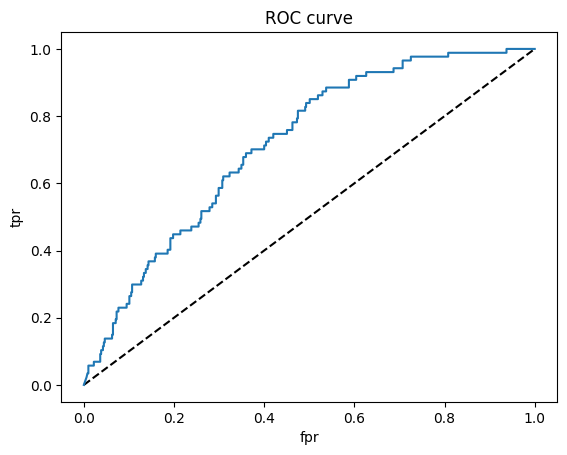

In [91]:
# Plotting the ROC curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [92]:
# Area under ROC curve
roc_auc_score(y_test,y_pred_proba_gnb)

0.7166724718448857

In [93]:
# Counts of test set
Counter(y_test)

Counter({0: 495, 1: 87})

In [94]:
# counts of predicted set
Counter(y_pred_gnb)

Counter({0: 480, 1: 102})

In [95]:
# Getting Classification report for Naive bayes classifier
dict1= classification_report(y_test, y_pred_gnb, output_dict=True)

#adding results to evaluation dataframe
tempodf=pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'Gaussian Naive Bayes Classifier'
res_df=res_df.append(tempodf[2:-2])

In [96]:
# Model Evaluation Dataframe
res_df

,precision,recall,f1-score,support,Model
accuracy,0.654639,0.654639,0.654639,0.654639,Logistic Regression Classifier
accuracy,0.742268,0.742268,0.742268,0.742268,K Nearest Neighbours
accuracy,0.781787,0.781787,0.781787,0.781787,Gaussian Naive Bayes Classifier


#### **Support Vector Machine**

SVM is a powerful supervised algorithm that works best on smaller datasets but on complex ones. Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks, but generally, they work best in classification problems.

**Support Vectors**: These are the points that are closest to the hyperplane. A separating line will be defined with the help of these data points.

**Margin**: it is the distance between the hyperplane and the observations closest to the hyperplane (support vectors). In SVM large margin is considered a good margin. There are two types of margins hard margin and soft margin.

In [97]:
#Create a svm Classifier
svmc = svm.SVC(kernel='poly') # Polynomial Kernel

# Fitting the model with training set
svmc.fit(X_smote, y_smote)

# Predicting values for test set
y_pred_svm = svmc.predict(X_test)

# Checking Model Accuracy
svmc.score(X_test, y_test)

0.6408934707903781

In [98]:
# Getting Classification report for SVM model
dict1 = classification_report(y_test, y_pred_svm, output_dict=True)

# Adding results to the evaluation dataframe
tempodf=pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'Support Vector Machine'
res_df=res_df.append(tempodf[2:-2])

In [99]:
# Model evaluation dataframe
res_df

,precision,recall,f1-score,support,Model
accuracy,0.654639,0.654639,0.654639,0.654639,Logistic Regression Classifier
accuracy,0.742268,0.742268,0.742268,0.742268,K Nearest Neighbours
accuracy,0.781787,0.781787,0.781787,0.781787,Gaussian Naive Bayes Classifier
accuracy,0.640893,0.640893,0.640893,0.640893,Support Vector Machine


#### **XGB Classifier**

The beauty of this powerful algorithm lies in its scalability, which drives fast learning through parallel and distributed computing and offers efficient memory usage.

XGBoost is an **ensemble learning** method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

The models that form the ensemble, also known as base learners, could be either from the same learning algorithm or different learning algorithms. **Bagging** and **Boosting** are two widely used ensemble learners. Though these two techniques can be used with several statistical models, the most predominant usage has been with decision trees.

In [100]:
# Implementing the XGBoost classifier model
model = xgb.XGBClassifier()

# Fitting the training set
model.fit(X_smote, y_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [101]:
# Making predictions on training and testing set
y_pred_xgb = model.predict(X_test)
y_train_pred = model.predict(X_smote)

In [102]:
# Display Accuracy on training and testing set
print(accuracy_score(y_train_pred, y_smote))
print(accuracy_score(y_pred_xgb, y_test))

0.9987199180747568
0.8195876288659794


In [103]:
# Confusion Matrix for XGB Classifier
confusion_matrix(y_test,y_pred_xgb)

array([[462,  33],
       [ 72,  15]])

In [104]:
# Getting Classification report for XGB classifier
dict1 = classification_report(y_test, y_pred_xgb, output_dict=True)

# Adding results to the evaluation dataframe
tempodf=pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'XGB CLassifier'
res_df=res_df.append(tempodf[2:-2])

In [105]:
# Model evaluation dataframe
res_df

,precision,recall,f1-score,support,Model
accuracy,0.654639,0.654639,0.654639,0.654639,Logistic Regression Classifier
accuracy,0.742268,0.742268,0.742268,0.742268,K Nearest Neighbours
accuracy,0.781787,0.781787,0.781787,0.781787,Gaussian Naive Bayes Classifier
accuracy,0.640893,0.640893,0.640893,0.640893,Support Vector Machine
accuracy,0.819588,0.819588,0.819588,0.819588,XGB CLassifier


#### **Decision tree**

Decision trees can be used for classification as well as regression problems. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.

Decision trees are upside down which means the root is at the top and then this root is split into various several nodes. Decision trees are nothing but a bunch of if-else statements in layman terms. It checks if the condition is true and if it is then it goes to the next node attached to that decision.

In a Decision Tree diagram, we have:

**Root Node**: The first split which decides the entire population or sample data should further get divided into two or more homogeneous sets. In our case, the Outlook node.

**Splitting**: It is a process of dividing a node into two or more sub-nodes.

**Decision Node**: This node decides whether/when a sub-node splits into further sub-nodes or not. Here we have, Outlook node, Humidity node, and Windy node.

**Leaf**: Terminal Node that predicts the outcome (categorical or continuous value). The coloured nodes, i.e., Yes and No nodes, are the leaves.

In [106]:
# variable to hold Maximum accuracy value
max_accuracy = 0

# Iterating upto 50 times with random states from 0 to 49
for x in range(50):

  # Creating model object for random forest classifier
  dt = DecisionTreeClassifier(random_state = x)

  # Fitting the model
  dt.fit(X_smote, y_smote)

  # Predict for testing set
  Y_pred_dt = dt.predict(X_test)

  # Accuracy at a particular random state
  current_accuracy = round(accuracy_score(Y_pred_dt, y_test)*100,2)

  # Compare to get the best accuracy and the respective random state
  if(current_accuracy > max_accuracy):
    max_accuracy = current_accuracy
    best_x = x

# Implementing Decision Tree Classifier model using the best random state we found
dt = DecisionTreeClassifier(random_state = best_x)

# Fitting training data
dt.fit(X_smote, y_smote)

# Predicting for test set
Y_pred_dt = dt.predict(X_test)

In [107]:
# Accuracy Score for decision tree classifier on test set
score_dt = round(accuracy_score(Y_pred_dt, y_test)*100, 2)
print("The accuracy score for test set achieved using Decision Tree is: " + str(score_dt) + "%")

The accuracy score for test set achieved using Decision Tree is: 76.63%


In [108]:
# Predicting for train set
y_pred_train_dt = dt.predict(X_smote)

# Accuracy Score for decision tree classifier on train set
score_dt = round(accuracy_score(y_pred_train_dt, y_smote)*100, 2)
print("The accuracy score for train set achieved using Decision Tree is: " + str(score_dt) + "%")

The accuracy score for train set achieved using Decision Tree is: 100.0%


In [109]:
# Getting Classification report for Decision tree model
dict1 = classification_report(y_test, Y_pred_dt, output_dict=True)

# Adding results to the model evaluation dataframe
tempodf = pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'Decision Tree Classifier'
res_df = res_df.append(tempodf[2:-2])

In [110]:
# Model evaluation dataframe
res_df

,precision,recall,f1-score,support,Model
accuracy,0.654639,0.654639,0.654639,0.654639,Logistic Regression Classifier
accuracy,0.742268,0.742268,0.742268,0.742268,K Nearest Neighbours
accuracy,0.781787,0.781787,0.781787,0.781787,Gaussian Naive Bayes Classifier
accuracy,0.640893,0.640893,0.640893,0.640893,Support Vector Machine
accuracy,0.819588,0.819588,0.819588,0.819588,XGB CLassifier
accuracy,0.766323,0.766323,0.766323,0.766323,Decision Tree Classifier


#### **Random Forest**

Random Forest is a technique that uses ensemble learning, that combines many weak classifiers to provide solutions to complex problems.

As the name suggests random forest consists of many decision trees. Rather than depending on one tree it takes the prediction from each tree and based on the majority votes of predictions, predicts the final output.

Random forests use the bagging method. It creates a subset of the original dataset, and the final output is based on majority ranking and hence the problem of overfitting is taken care of.

In [111]:
# variable to hold Maximum accuracy value
max_accuracy = 0

# Iterating upto 50 times with random states from 0 to 49
for x in range(50):
  # Creating model object for random forest classifier
  rf = RandomForestClassifier(random_state=x)

  # Fitting the model
  rf.fit(X_smote,y_smote)

  # Predict for testing set
  Y_pred_rf = rf.predict(X_test)

  # Accuracy at a particular random state
  current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)

  # Compare to get the best accuracy and the respective random state
  if(current_accuracy>max_accuracy):
    max_accuracy = current_accuracy
    best_x = x

# Implementing Random Forest classifier model using the best random state we found
rf = RandomForestClassifier(random_state=best_x)

# Fitting the model
rf.fit(X_smote,y_smote)

# Predicting on test set
Y_pred_rf = rf.predict(X_test)

In [112]:
# Accuracy score for the random forest model on test set
score_rf = round(accuracy_score(Y_pred_rf, y_test)*100, 2)
print("The accuracy score for the test set achieved using Random forest is: " + str(score_rf) + " %")

The accuracy score for the test set achieved using Random forest is: 83.85 %


In [113]:
# Confusion matrix for random forest model
confusion_matrix(y_test,Y_pred_rf)

array([[477,  18],
       [ 76,  11]])

In [114]:
# Predicting values for train set
y_pred_train_rf = rf.predict(X_smote)

In [115]:
# Accuracy score for the random forest model on train set
score_rf = round(accuracy_score(y_pred_train_rf, y_smote)*100, 2)
print("The accuracy score for the train set achieved using Random forest is: " + str(score_rf) + " %")

The accuracy score for the train set achieved using Random forest is: 100.0 %


In [116]:
# Getting Classification report for random forest model
dict1 = classification_report(y_test, Y_pred_rf, output_dict=True)

# Adding results to the model evaluation dataframe
tempodf=pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'Random Forest Classifier'
res_df=res_df.append(tempodf[2:-2])

In [117]:
# Model evaluation dataframe
res_df

,precision,recall,f1-score,support,Model
accuracy,0.654639,0.654639,0.654639,0.654639,Logistic Regression Classifier
accuracy,0.742268,0.742268,0.742268,0.742268,K Nearest Neighbours
accuracy,0.781787,0.781787,0.781787,0.781787,Gaussian Naive Bayes Classifier
accuracy,0.640893,0.640893,0.640893,0.640893,Support Vector Machine
accuracy,0.819588,0.819588,0.819588,0.819588,XGB CLassifier
accuracy,0.766323,0.766323,0.766323,0.766323,Decision Tree Classifier
accuracy,0.838488,0.838488,0.838488,0.838488,Random Forest Classifier


#### **Neural Network**

“Neural networks” (more specifically, artificial neural networks) are loosely based on how our human brain works, and the basic unit of a neural network is a neuron.

*At the basic level, a neuron does two things:*

* Receive input from other neurons and combine them together
* Perform some kind of transformation to give the neuron’s output

we often take some linear combination of the inputs. In layman terms, if we had three inputs to the neuron (let’s call them x1, x2, and x3), then we would combine them like this:


**-- + -- x A1 + -- x A2 + -- x A3**
-----------------


*This is a linear combination of inputs to our neurons where the individual blanks are parameters to be optimized for later (i.e. learn from the data what numbers best fill in those blanks). In mathematical terms, the blanks that are attached to the inputs (x1, x2 and x3) are called weights and the blank that is not attached to any input is called the bias.*

**Note:** The neural network is an experimental model that we have implemented, its still in development and we hav'nt figured out the best combination of tuning parameters for our data. The code is ambigious and it doesn't quite perform the same way with every re-run, the accuracy for the model fluctuates a lot and its not fully optimised yet.

In [118]:
# Developing a Neural network with 2 hidden layers and 1 output layer
def get_model():

    # Creating sequential NN model
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=[X_train.shape[-1]]),

        # using 'tanh' function as the activation function in hidden layers
        keras.layers.Dense(512, activation='tanh'),
        keras.layers.Dense(256, activation='tanh'),

        # keras.layers.Dense(128, activation='relu'),
        # keras.layers.Dense(64, activation='relu'),
        # keras.layers.Dense(32, activation='relu'),
        # keras.layers.Dropout(0.5),

        # using 'sigmoid' function as activation function in output layer
        # this is because we only need to perform a binary classification
        keras.layers.Dense(2, activation='sigmoid')
    ])

    # Compiling the model
    model.compile(optimizer = 'Adagrad',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [119]:
# Define a batch size
batch_size = 512

# Creating training and testing datasets using tenserflow
train_ds = tf.data.Dataset.from_tensor_slices((X_smote, y_smote)).shuffle(len(X_train)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

# Get model object
model = get_model()

# Fitting training data to the model
fit = model.fit(train_ds, validation_data=val_ds, epochs = 40)

Epoch 1/40
8/8 [==============================] - 2s 88ms/step - loss: 0.7062 - accuracy: 0.5440 - val_loss: 0.8217 - val_accuracy: 0.2234
Epoch 2/40
8/8 [==============================] - 0s 38ms/step - loss: 0.6984 - accuracy: 0.5266 - val_loss: 0.7948 - val_accuracy: 0.3076
Epoch 3/40
8/8 [==============================] - 0s 44ms/step - loss: 0.6874 - accuracy: 0.5553 - val_loss: 0.8087 - val_accuracy: 0.3127
Epoch 4/40
8/8 [==============================] - 0s 42ms/step - loss: 0.6850 - accuracy: 0.5545 - val_loss: 0.7459 - val_accuracy: 0.4244
Epoch 5/40
8/8 [==============================] - 0s 51ms/step - loss: 0.6752 - accuracy: 0.5727 - val_loss: 0.7575 - val_accuracy: 0.4072
Epoch 6/40
8/8 [==============================] - 0s 43ms/step - loss: 0.6707 - accuracy: 0.5701 - val_loss: 0.8115 - val_accuracy: 0.3385
Epoch 7/40
8/8 [==============================] - 0s 41ms/step - loss: 0.6707 - accuracy: 0.5758 - val_loss: 0.7484 - val_accuracy: 0.4502
Epoch 8/40
8/8 [===========

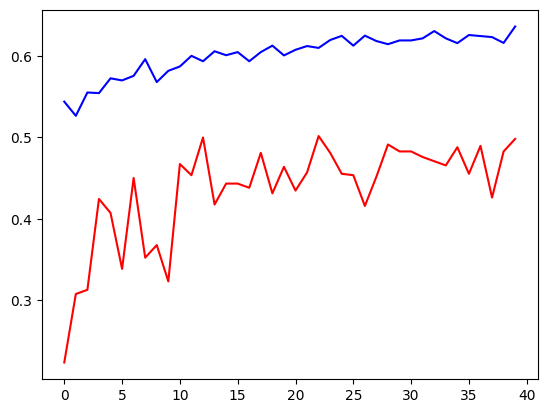

In [120]:
# Plotting a trend graph for 'accuracy' vs 'val_accuracy'
plt.plot(fit.history['accuracy'], color='blue')
plt.plot(fit.history['val_accuracy'], color='red')
plt.show()

In [121]:
# Predicted values for Neural Network model on test set
y_pred_nn = np.round(model.predict(X_test), 0)

19/19 [==============================] - 0s 3ms/step


In [122]:
# Converting the results into numpy array
y_pred_nn = np.array([round(ele[1]) for ele in y_pred_nn])

In [123]:
# Converting test set values into numpy array
y_test = (np.array(y_test))

In [124]:
# Lengths of both test and predict values
# Anonymously the length were differentiable on some re-runs, checking just in case!
print(len(y_pred_nn))
print(len(y_test))

582
582


In [125]:
# Getting Classification report for neural network model
dict1 = classification_report(y_test, y_pred_nn, output_dict=True)

# Adding results to the Model evaluation dataframe
tempodf=pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'Neural network(Experimental)'
res_df=res_df.append(tempodf[2:-2])

In [126]:
# Model evaluation dataframe
res_df

,precision,recall,f1-score,support,Model
accuracy,0.654639,0.654639,0.654639,0.654639,Logistic Regression Classifier
accuracy,0.742268,0.742268,0.742268,0.742268,K Nearest Neighbours
accuracy,0.781787,0.781787,0.781787,0.781787,Gaussian Naive Bayes Classifier
accuracy,0.640893,0.640893,0.640893,0.640893,Support Vector Machine
accuracy,0.819588,0.819588,0.819588,0.819588,XGB CLassifier
accuracy,0.766323,0.766323,0.766323,0.766323,Decision Tree Classifier
accuracy,0.838488,0.838488,0.838488,0.838488,Random Forest Classifier
accuracy,0.850515,0.850515,0.850515,0.850515,Neural network(Experimental)


## **Conclusion**

Now that we are finished implementing all the models, its time to evaluate them and conclude our findings and learnings over them.

Lets have a look at the accuracy scores for all the models.

In [127]:
res_df

,precision,recall,f1-score,support,Model
accuracy,0.654639,0.654639,0.654639,0.654639,Logistic Regression Classifier
accuracy,0.742268,0.742268,0.742268,0.742268,K Nearest Neighbours
accuracy,0.781787,0.781787,0.781787,0.781787,Gaussian Naive Bayes Classifier
accuracy,0.640893,0.640893,0.640893,0.640893,Support Vector Machine
accuracy,0.819588,0.819588,0.819588,0.819588,XGB CLassifier
accuracy,0.766323,0.766323,0.766323,0.766323,Decision Tree Classifier
accuracy,0.838488,0.838488,0.838488,0.838488,Random Forest Classifier
accuracy,0.850515,0.850515,0.850515,0.850515,Neural network(Experimental)


We've noticed that XBG Classifier is the stand out performer among all models with an f1-score of __0.828__. It is by far the second highest score we have achieved. Hence, it's safe to say that XGB Classifier provides an optimal solution to our problem.

In case of Logistic regression, We were able to see the maximum f1-score of __0.656__, also in case of K-Nearest Neighbors, the f1-score extends upto __0.742__.

Naive Bayes Classifier showed a balanced result amongst the model we have implemented, it has a f1-score of __0.781__, which is neutral with regards to our observations across various models. But in case of SVM(Support Vector Machines) Classifier, the f1-score lies around __0.64__, which also happens to be the lowest score among all models we've implemented.

Out of the tree-based algorithms, the Random Forest Classifier was providing an optimal solution towards achieving our Objective. We were able to achieve an f1-score of __0.838__ for the test split, which is higher than any other model(excluding NN). We also noticed that in the case of Decision-tree Classifier, we were able to achieve an f1-score of __0.768__ for the test split.

We have also implemented a experimental neural network, however the results were ambiguous  and non-conclusive. Currently we were able to see an accuracy as high as __0.850__, but the accuracy fluctuates within a continous range. The accuracy value may have been the highest at this point, still its not consistent with several re-runs of the code. However the NN approach seems promising and we will try tuning it further in future to get better results.

**Finally, we can conclude that Random forest and XGB classifier might provide the best results for this particular problem, moreever we can optimise these models using Grid Search CV(cross validation) and hyperparameter tuning to get better results.**




*At the end a word of Thankyou to you for going through our project till the very end, we appreciate your time. Happy Learning!*